In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn import cluster
from sklearn.model_selection import train_test_split
from sklearn.metrics import pairwise_distances_argmin

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [2]:
# Read the data
features = pd.read_csv('./medical/historical_X.dat', header=None, sep=" ").values
actions = pd.read_csv('./medical/historical_A.dat', header=None, sep=" ").values
outcome = pd.read_csv('./medical/historical_Y.dat', header=None, sep=" ").values
observations = features[:, :128]
labels = features[:,128] + features[:,129]*2

In [3]:
features.shape

(10000, 130)

In [4]:
observations.shape

(10000, 128)

In [5]:
symptoms = np.append(observations, labels[:,None], 1)
symptoms.shape

(10000, 129)

In [14]:
# Read the data
features = pd.read_csv('./medical/historical_X.dat', header=None, sep=" ")
actions = pd.read_csv('./medical/historical_A.dat', header=None, sep=" ")
outcome = pd.read_csv('./medical/historical_Y.dat', header=None, sep=" ")
#observations = features[:, :128]
#labels = features[:,128] + features[:,129]*2

In [15]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 130 entries, 0 to 129
dtypes: int64(130)
memory usage: 9.9 MB


In [6]:
symptoms_true = symptoms[np.where(symptoms[:,128] != 0)]
symptoms_false = symptoms[np.where(symptoms[:,128] == 0)]

print(symptoms_true.shape)
print(symptoms_false.shape)

(5168, 129)
(4832, 129)


In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram symptoms")
dend = shc.dendrogram(shc.linkage(symptoms_true[:,:127], method='ward')) #without the actual labels.
plt.show()

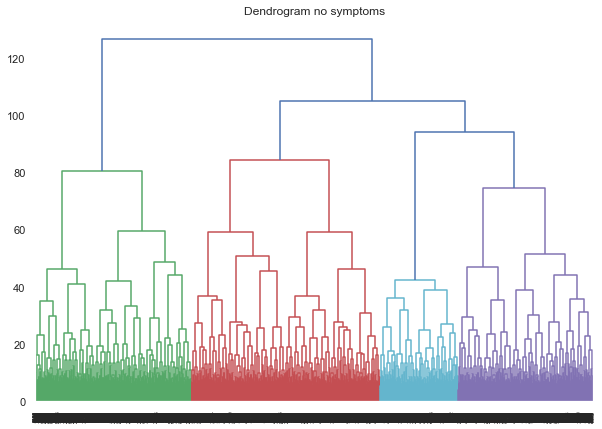

In [14]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram no symptoms")
dend = shc.dendrogram(shc.linkage(symptoms_false[:,:127], method='ward')) #without the actual labels. 
plt.show()

In [11]:
k = 4

In [23]:

cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
#euclidean = distance between datapoints, 'ward' = minimizes the variant between the clusters
h_clusters = cluster.fit_predict(observations)

print(cluster.labels_)

[3 0 0 ... 1 0 0]


In [54]:
def find_clusters(X, n_clusters, rseed = 2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        labels = pairwise_distances_argmin(X, centers)
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

In [12]:
from sklearn import cluster

In [63]:
centers, k_clusters = find_clusters(observations, k)

In [15]:
k_clusters = cluster.KMeans(n_clusters=k).fit(observations)

In [21]:
k_clusters = k_clusters.labels_
k_clusters

AttributeError: 'numpy.ndarray' object has no attribute 'labels_'

In [24]:
h_clusters

array([3, 0, 0, ..., 1, 0, 0])

In [25]:
obs_clusters_hier = np.append(observations , h_clusters[:,None], 1)
obs_clusters_kmeans = np.append(observations, k_clusters[:,None], 1)

In [26]:
obs_clusters_hier = np.append(obs_clusters_hier, labels[:,None], 1)
obs_clusters_kmeans = np.append(obs_clusters_kmeans, labels[:,None], 1)

In [27]:
obs_clusters_hier.shape

# last column (130) is labels
# 129 is clusters 

(10000, 130)

In [28]:
labels[:20]

array([1, 0, 0, 0, 1, 2, 0, 0, 1, 0, 1, 1, 0, 3, 0, 0, 1, 1, 0, 0])

In [29]:
obs_clusters_hier

array([[0, 0, 0, ..., 0, 3, 1],
       [0, 1, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 1, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 0, 1]])

In [30]:
symptoms_true_h = obs_clusters_hier[np.where(obs_clusters_hier[:,129] != 0)]
symptoms_true_k = obs_clusters_kmeans[np.where(obs_clusters_kmeans[:,129] != 0)]


symptoms_true_h.shape

(5168, 130)

In [31]:
symptoms_false_h = obs_clusters_hier[np.where(obs_clusters_hier[:,129] == 0)]
symptoms_false_k = obs_clusters_kmeans[np.where(obs_clusters_kmeans[:,129] == 0)]


symptoms_false_h.shape

(4832, 130)

In [32]:
clusters_no_symp_k = symptoms_false_k[:,128]
clusters_symp_k = symptoms_true_k[:,128]

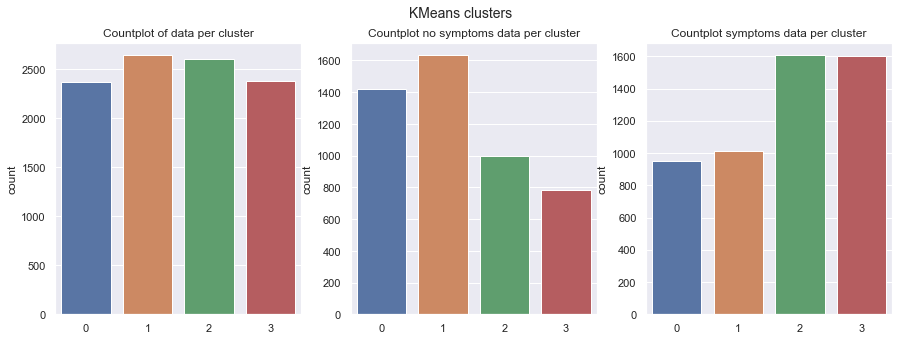

In [33]:
fig1, ax = plt.subplots(figsize = (15, 5), ncols = 3)
sns.countplot(k_clusters, ax = ax[0])
sns.countplot(clusters_no_symp_k, ax = ax[1])
sns.countplot(clusters_symp_k, ax = ax[2])

fig1.suptitle("KMeans clusters", fontsize=14)
ax[0].set_title('Countplot of data per cluster')
ax[1].set_title('Countplot no symptoms data per cluster')
ax[2].set_title('Countplot symptoms data per cluster')


plt.show()

In [55]:
k = 3

In [56]:
obs_symp_true = symptoms_true[:,:128]
labels_symp_true = symptoms_true[:,128]

centers_symp, k_clusters_symp = find_clusters(obs_symp_true, k)
symp_clusters = np.append(obs_symp_true, k_clusters_symp[:,None], 1)
symp_clusters = np.append(symp_clusters, labels_symp_true[:,None], 1)

In [57]:
symp_clusters

array([[0, 0, 0, ..., 0, 2, 1],
       [0, 1, 0, ..., 1, 0, 1],
       [1, 0, 1, ..., 0, 1, 2],
       ...,
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 2, 1],
       [1, 0, 0, ..., 1, 0, 1]])

In [58]:
# symp_clusters[:,129] zijn de symptomen, 
# symp_clusters[:,128] de clusters

In [59]:
symptom_a = symp_clusters[np.where(symp_clusters[:,129] == 1)]
symptom_b = symp_clusters[np.where(symp_clusters[:,129] == 2)]
symptom_both = symp_clusters[np.where(symp_clusters[:,129] == 3)]

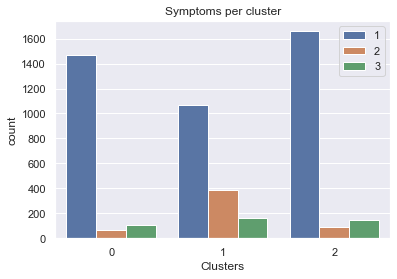

In [60]:
g = sns.countplot(x = symp_clusters[:,128], hue = symp_clusters[:,129])
plt.title('Symptoms per cluster')
plt.xlabel('Clusters')
    
plt.show()

Text(0.5, 1.0, 'countplot hierarchical clusters')

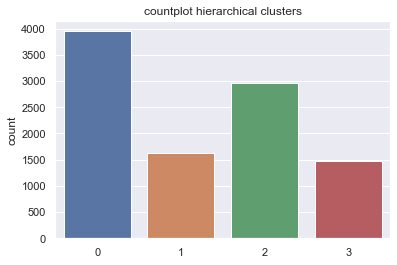

In [76]:
sns.countplot(h_clusters)
plt.title('countplot hierarchical clusters')

Text(0.5, 1.0, 'countplot clusters no symptoms hierarchical')

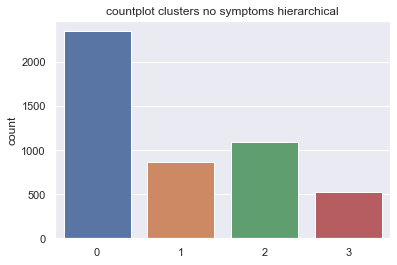

In [77]:
clusters_no_symp_h = symptoms_false_h[:,128]

sns.countplot(clusters_no_symp_h)
plt.title('countplot clusters no symptoms hierarchical')

Text(0.5, 1.0, 'countplot clusters symptoms hierarchical')

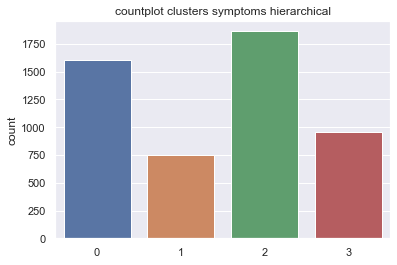

In [78]:
clusters_symp_h = symptoms_true_h[:,128]

sns.countplot(clusters_symp_h)
plt.title('countplot clusters symptoms hierarchical')

For both kmeans clustering and hierarchical clustering the people with symptoms seem to fall in different categories than the people without symptoms, even though there is a lot of overlap. 

In [17]:
# target = labels 
# data = observations

In [5]:
data = np.append(observations, labels[:,None], 1)
data.shape

#target = data[:,128]

(10000, 129)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate, KFold

In [7]:
clf = RandomForestClassifier(n_estimators=130, random_state=0)
clf.fit(data[:,:128], data[:,128])

#clf_cv = cross_validate(clf, data[:,:128], data[:,128], cv = 5, return_estimator = True)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=130,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [24]:
kf = KFold(n_splits=10)
rfc = RandomForestClassifier(n_estimators = 100)
count = 1

X = data[:,:128]
y = data[:,128]

imp_sorted_ = {}
feat_imp = np.zeros((len(X), 10))


for train, _ in kf.split(X, y):
    rfc.fit(X[train, :], y[train])
    feat_imp = pd.DataFrame(rfc.feature_importances_)
    print(feat_imp)



            0
0    0.011526
1    0.013439
2    0.005335
3    0.049441
4    0.008014
5    0.072036
6    0.006013
7    0.005744
8    0.005832
9    0.006545
10   0.004710
11   0.014893
12   0.005929
13   0.007077
14   0.005438
15   0.005862
16   0.006238
17   0.005129
18   0.005481
19   0.005609
20   0.005300
21   0.005594
22   0.006381
23   0.005600
24   0.005639
25   0.005849
26   0.005848
27   0.005079
28   0.006799
29   0.005312
..        ...
98   0.005306
99   0.006110
100  0.005455
101  0.005783
102  0.006055
103  0.006244
104  0.005619
105  0.007784
106  0.006007
107  0.005816
108  0.009219
109  0.006307
110  0.005655
111  0.005982
112  0.008658
113  0.026189
114  0.006466
115  0.006837
116  0.005704
117  0.005255
118  0.005459
119  0.007526
120  0.006450
121  0.005479
122  0.007645
123  0.005955
124  0.005332
125  0.006894
126  0.009948
127  0.011387

[128 rows x 1 columns]
            0
0    0.010930
1    0.013963
2    0.005989
3    0.047236
4    0.008877
5    0.071431
6    0.006

In [12]:
kf = KFold(n_splits=10)
rfc = RandomForestClassifier(n_estimators = 100)
count = 1

X = data[:,:128]
y = data[:,128]

imp_sorted_ = {}
for train, _ in kf.split(X, y):
    rfc.fit(X[train, :], y[train])
    
    for key, value in enumerate(rfc.feature_importances_):    
        imp_sorted_[key] = imp_sorted_.get(key, 0) + value

feature_imp = pd.DataFrame.from_dict(imp_sorted_, orient = 'index', columns = ['avg_imp'])
#feature_imp['avg_imp'] = feature_imp['avg_imp']/10
#feature_imp.sort_values(by = 'avg_imp', ascending = False).head()

In [13]:
feature_imp

,avg_imp
0,0.112196
1,0.137635
2,0.061804
3,0.469903
4,0.084496
5,0.704018
6,0.063454
7,0.059477
8,0.057141
9,0.071477


In [3]:
Xtrain, Xholdout, ytrain, yholdout = train_test_split(observations, outcome, test_size = 0.5)

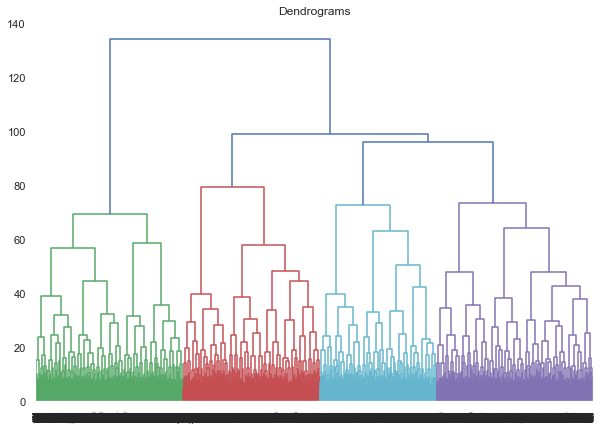

In [4]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(Xtrain, method='ward'))
plt.show()